<h3>Generate MRI images of different contrast levels using cyclic GANs</h3>
<br>
<p><b>Capstone Summary : </b> Medical misdiagnosis is an extremely serious problem, but it also happens far too frequently. Since interpreting imaging methods in the medical profession is not a straightforward binary process (Normal or Abnormal), it is necessary to have a radiologist's opinion. Even so, it's possible for one radiologist to detect something another misses. Conflicting information might result from this, making it challenging to appropriately suggest therapy options to the patient.


The diagnosis of an MRI (Magnetic Resonance Imaging) is one of the challenging challenges in medical imaging. The radiologist may occasionally require several imaging modalities to interpret the scan, which can significantly improve diagnosis accuracy by giving practitioners a more complete knowledge.

But getting access to various imaging is expensive and complex. We can employ style transfer to create artificial MRI images of various contrast levels from pre-existing MRI scans with the use of deep learning. With the use of a second image, this will aid in providing a better diagnosis.

To transfer the style of one MRI image to another in this capstone and improve understanding of the scanned image, CycleGAN will be used. You can convert T1 weighted MRI scans into T2 weighted pictures using GANs, and vice versa.
</p>
<br>
<p><b>Project Statement : </b>To develop a generative adversarial model (modified U-Net) that can create synthetic MRI pictures with various contrast levels from existing MRI scans</p>

<p><b>Dataset Used : </b>MRI+T1_T2+Dataset</p>

<p>NOTE: Since this is an unpaired dataset, there is no relationship whatsoever between the T1 and T2 MRI images that are part of it.</p>

<br>

# Imports

In [5]:
#Import all the required libraries to python 
!pip install tensorflow 
!pip install keras
!pip install matplotlib
!pip install scikit-image
!pip install imageio
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [6]:
#Import all the required libraries

# Data Science 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Deep Learning 
import tensorflow as tf

# Image Preprocess 
import skimage
from skimage.transform import resize
import imageio
import PIL
from PIL import Image

# OS Navigation 
import glob
import os
import sys
from sys import platform

# Ignore Warnings 
import warnings
warnings.filterwarnings("ignore")

# notebook imports 
from IPython.display import clear_output

In [7]:
# Printing all the version of require libraries 
print("Numpy : {}" .format(np.__version__))
print("matplotlib : {}" .format(matplotlib.__version__))
print("tensorflow : {}" .format(tf.__version__))
print("skimage : {}" .format(skimage.__version__))
print("imageio : {}" .format(imageio.__version__))
print("PIL : {}" .format(PIL.__version__))
print("sys : {}" .format(sys.version))

Numpy : 1.23.3
matplotlib : 3.5.2
tensorflow : 2.13.0
skimage : 0.19.2
imageio : 2.19.3
PIL : 9.2.0
sys : 3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


In [8]:
# Check if the module is present in sys.modules 
def is_imported(module, sys_imported = "sys" in dir()):
    """
    This function is responsible for checking if a required module is present in the enviorment or not 
    :params module: (str)
    """
    try:
        if type(module) == str:
            if sys_imported:
                return module in sys.modules
            else:
                raise ModuleNotFoundError("Module Missing sys, please import sys module to the enviorment")
        else:
            raise TypeError("Expected input as String and not any other type")

    except Exception as e:
        print("Operation could not be started due to  {} : {}" .format(type(e).__name__, e.args))

# Exploratory Data Analytics

Import the images & create two seperate datasets. The input shape for image should be (256, 256)


#### Data Loading and Path Storing

In [9]:
# Creating a dynamic path 

# Current platform
current_platform = sys.platform

# path for current working directory 
path = os.getcwd()

# Replace "/" and "\"
if current_platform == "linux" or current_platform == "linux2": # Linux
    path.replace("/", os.sep)
elif current_platform == "darwin": # MacOS
    path.replace("/", os.sep)
elif current_platform == "win32": # Windows
    path.replace("\\", os.sep)
else:
    path.replace("/", os.sep)

# Storing Paths
t1_path = os.path.join(path, "MRI+T1_T2+Dataset"+os.sep+"Tr1"+os.sep+"TrainT1")
t2_path = os.path.join(path, "MRI+T1_T2+Dataset"+os.sep+"Tr2"+os.sep+"TrainT2")

In [10]:
#Create the dataset from image directory
tr1 = t1_path

In [11]:
#Create the dataset from image directory
tr2 = t2_path

In [12]:
# Listing images in the location "TrainT1" and "TrainT2"
t1_images = os.listdir(t1_path)
t2_images = os.listdir(t2_path)

In [13]:
# Valiadting the filename extension
t1_images[1]

'Image #11.png'

# Visualizing the image in Matrix

In [14]:
# Creating the Numpy array of the image
imageio.imread(t1_path+ os.sep +t1_images[2])

Array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

#### Exploring the Structure

In [15]:
# Convert the images to from the folder to list of numpy array 
def image_extractor(folder_path, folder_image_list):
    
    """
    This function is used to convert all the images given in a folder with the respective path to it to list of 
    :param ospath: loaction to the folder 
    :param imgfolder: target folder name
    :return: numpy arrray of images 
    """
    # Checking if numpy is imported as os is a default module 
    if is_imported("numpy"):
        # Checking if imageio is imported as os is a default module 
        if is_imported("imageio"):

            # Stroing images in a list     
            img_lst = []

            # Appending all the images to the list     
            for file in folder_image_list:
                read_img = imageio.imread(folder_path+ '/' + file)
                img_lst.append(read_img)

            # converts list to a numpy array
            final_array = np.asarray(img_lst)

            return final_array

        else:
            raise ImportError("Missing imageio module, Please Import the imageio module")
    else:
        raise ImportError("Missing numpy module, Please Import the numpy module")
    


# Data loading
t1 = image_extractor(t1_path, t1_images)
t2 = image_extractor(t2_path, t2_images)

In [16]:
# Printing the shape 
print('T1 Shape : {}' .format(t1.shape))
print('T2 Shape: {}' .format(t2.shape))

# Printing the dimentions of images
print('In T1 each image is {} dimention' .format(t1.shape[1:]))
print('In T2 each image is {} dimention' .format(t2.shape[1:]))

# Printing the Number of images in each folder 
print('T1 Folder has {} images' .format(t1.shape[0]))
print('T1 Folder has {} images' .format(t2.shape[0]))

# Adding all the rows of t1 and t2 
print('Total Number of images in Dataset : {}' .format(t1.shape[0]+t2.shape[0]))

T1 Shape : (43, 217, 181)
T2 Shape: (46, 217, 181)
In T1 each image is (217, 181) dimention
In T2 each image is (217, 181) dimention
T1 Folder has 43 images
T1 Folder has 46 images
Total Number of images in Dataset : 89


<p style="color:yellow"><b>Observation : </b>We can Observe that the number of images in the dataset is less compared to usual training dataset, Hence we know the ability of the Generated Adversal Networks to generate images of unpaired images learning the features in every time it train therefore we can tradeoff the data augmentation with more number of epochs</p>

<p>The dataset consist of only 89 images which are of dimentions 217*181</p>

# Data Visualization

In [17]:
# Visualizing the images 
def img_data(folder_location, n=5):
    """
    This function is used to create subplot of the images in the given folder location.
    :params folder_location: (String) absolute location of the folder 
    :params n: (int) Number of images to be displayed 
    :return: None 
    """
    
    # Create empty list
    img_lst=[]
    
    # listing images from the folder location 
    fldr_lst = os.listdir(folder_location)
    
    # Getting the name of the folder 
    fldr_name = folder_location.split(os.sep)[-1]
    
    # Looping through the images in fldr_lst created and appending converted np images to img_lst
    for img in fldr_lst:
        read_img = np.asarray(imageio.imread(folder_location+os.sep+img))
        img_lst.append(read_img)
    
    # Createing new slice of the list according to the given argument "n"
    new_img_list = img_lst[:n]
    
    # Here a=Number of Rows, b=Number of Columns and c=index  for subplot
    a = len(new_img_list) 
    b = 3
    c = 1 
    
    # Setting figure size 
    fig = plt.figure(figsize=(15,10))
    
    # Adding main title for each subplot 
    fig.suptitle("Images in folder "+fldr_name)
    
    # Lopping through new sliced image list 
    for i in new_img_list:
        plt.subplot(a, b, c)
        plt.title('Figure Shape: {}'.format(np.asarray(i).shape))
        plt.imshow(i, cmap="gray")
        c = c + 1
    
    # Tight layout Config
    plt.tight_layout()
    
    # Showing the image 
    plt.show()
    
    return None 

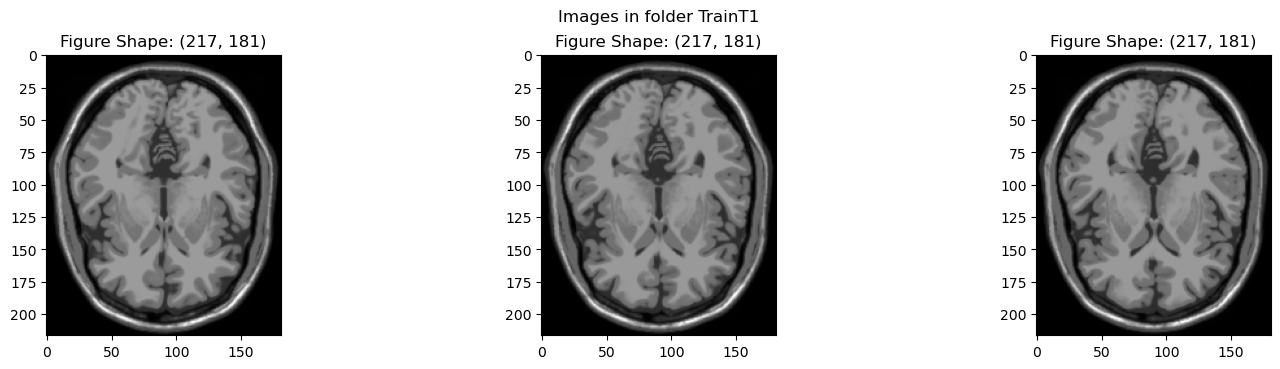

In [18]:
# Visualizing images in T1 dataset 
img_data(t1_path, n=3)

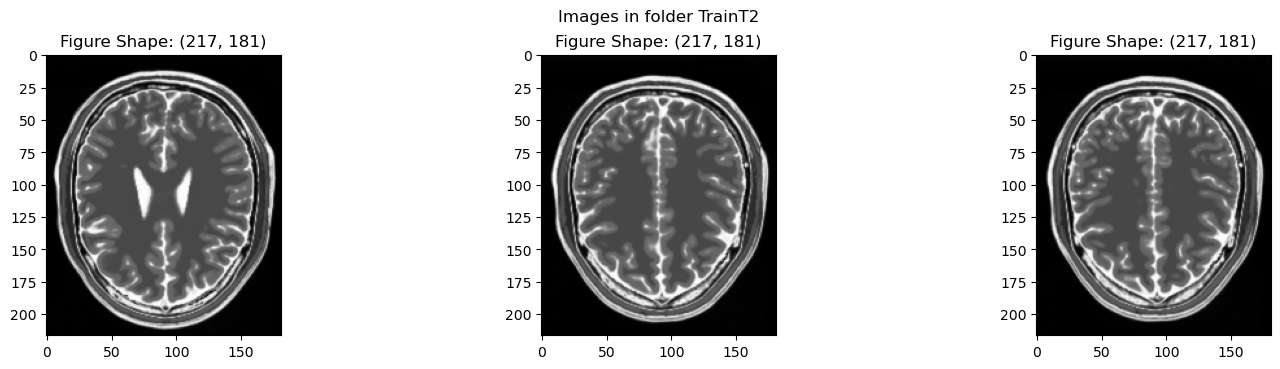

In [19]:
# Visualizing images in T2 dataset 
img_data(t2_path, n=3)

<p><b style="color:yellow">Observation</b> : The image here are of size 217 pixel height and 181 pixel width which exaplins the why the images are longer in height and shorter in with giving us the potrait view</p>

<p><b style="color:yellow">Observation</b> :The images are in two different folders t1 and t2 are of seprate style we can observe here they are also not paired</p>